# Optimisation et présentation des résultats

Nous allons commencer a travailler avec des données numériques en utilisant la librarie **numpy**, à résoudre des problèmes simples d'optimisation numériques en utilisant la librarie **scipy** et en particulier les fonctions de **scipy.optimize**, et enfin nous présenterons les résutats sous forme "textuelle" avec la fonction **print**, et de graphiques avec **matplotlib**.

## Références:

- print: [exemples](https://www.python-course.eu/python3_formatted_output.php) (détaillés)
- numpy: [tutoriel détaillé](https://www.python-course.eu/numpy.php)
- matplotlib: [exemples](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html), [documentation](https://matplotlib.org/stable/users/index.html), [styles](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
- scipy-optimize: [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html)
$\def\R{\mathbb{R}}$

# Problème du consommateur
 

Nous allons considérer un consommateur dont les préférences en matière de consommation sont représentées par une fonction d'utilité,
$
\begin{align*}
u(q_1, q_2): \R_{+}^2 &\rightarrow \R.
\end{align*}
$

On considère ainsi le cadre de paniers de biens à deux composantes. D'autre part, nous supposons que le consommateur dispose d'un revenu $R$ déterminé de façon exogène par rapport à son choix de consommation. Enfin le vecteur de prix $p = (p_1, p_2)$ est aussi exogène, le consommateur le considérant comme donné.

Le problème de choix du consommateur consiste à déterminer le panier *optimal* $q^* = (q_1^*, q_2^*)$ au sens où il maximise son utilité sous sa contrainte de budjet. Formellement,

$
\begin{align*}
V(p_1,p_2, R) &= \max_{q_1, q_2} u(q_1, q_2)\\
&s.c.,\\
p_1q_1 + p_2q_2\leq R,& \quad p_1, p_2, R > 0,\\
% &q_1, q_2 \geq 0
\end{align*}
$

## Exemple: fonction d'utilité Cobb-Douglas.

Dans cet exemple $u(\cdot)$ est donnée par,

$
\begin{align*}
u(q_1, q_2) &= q_1^\alpha q_2^{1-\alpha}, \quad \alpha \in (0, 1).
\end{align*}
$

Les solutions optimales sont ici:

$
\begin{align*}
q^{*}_1 &= \alpha\frac{R}{p_1},\\
q^{*}_2 &= (1-\alpha)\frac{R}{p_2}.
\end{align*}
$

$q^*_1$, et $q^*_2$ sont des fonctions des prix des biens, et du revenu, qu'on appelle *fonctions de demande*, et que l'on note respectivement $q_1^d(p, R)$, et $q_2^d(p, R)$.

# Calcul numérique avec numpy 

In [9]:
import numpy as np # importation de la bibliothèque numpy

## L'**array** numpy

Un array numpy est semblable à une liste avec cependant les deux différences suivantes:

1. Les éléments sont homogènes.
2. Une opération de *slicing* sur un array produit une "vue"(à *view*) de celui-ci plutôt que d'extraire du contenu.

## Les bases

Un array numpy peut être créé à partir d'une liste et être multidimensionnel.



In [ ]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # une dimension
B = np.array([[3.4, 8.7, 9.9], 
              [1.1, -7.8, -0.7],
              [4.1, 12.3, 4.8]]) # deux dimensions

print(type(A),type(B)) # type
print(A.dtype,B.dtype) # le type des éléments dans les array
print(A.ndim,B.ndim) # dimensions
print(A.shape,B.shape) # "shape" ou format (e.g, 1d: nombre d'éléments, 2d: nombre de lignes x nombre de colonnes)
print(A.size,B.size) # taille(i.e., nombre d'élèments)

Le **Slicing** sur un array produit une **vue** de celui-ci:




In [ ]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
B = A.copy() # B est une copie de A
C = A[2:6] # C obtenu par slicing sur A produit une vue de A
C[0] = 0
C[1] = 0
print(A) # A est modifié
print(B) # B ne l'est pas

Un array peut aussi être créé en appliquant des fonction numpy qui donnent des arrays spécifiques 

In [ ]:
print(np.ones((2,3))) # array rempli de 1
print(np.zeros((4,2))) # array rempli de zéros
print(np.full((3, 5), 3.14)) # array rempli d'un nombre désré
print(np.arange(0, 10)) # suite de nombres équidistants
print(np.eye(3)) # array sous forme d'une matrice identité
print(np.linspace(0,1,6)) # suite: interpolation linéaire entre deux bornes



Des précisions sur une fonction comme `np.linspace` peuvent être obtenues avec

In [ ]:
help(np.linspace)

**Remarque**: dans les fonctions précédentes on peut ajouter un argument dtype pour contraindre le type du array(int, ou float).

In [ ]:
print(np.ones((2,3), dtype=int)) # array rempli de 1
print(np.zeros((4,2), dtype=int)) # array rempli de zéros

## Opérations mathématiques sur les array

In [ ]:
A = np.array([[1,0],[0,1]])
B = np.array([[2,2],[2,2]])

print(A,'\n')
print(B, '\n')
print(A + B,'\n')
print(A - B,'\n')
print(A * B,'\n') # produit élément par élément
print(A / B,'\n') # division élément par élément
print(A @ B,'\n') # produit matriciel

Lorsque les arrays n'ont pas le même format le **broadcasting** est utilisé dans certains cas. Voici un exemple avec la multiplication:

In [ ]:
A = np.array([ [10, 20, 30], [40, 50, 60] ]) # format = (2,3) 
B = np.array([1, 2, 3]) # format = (3,) = (1,3)
C = np.array([[1],[2]]) # format = (2,1)


print(A, A.shape, '\n')
print(B, B.shape, '\n') # on remarque la transformation du format en vecteur colonne!
print(C, C.shape, '\n') 

print(A*B,'\n') # chaque ligne est multipliée par B
print(A*C,'\n') # chaque colonne est multipliée par C

Si l'on veut e.g. additionner deux arrays et que le broadcasting est impossible on peut utiliser **np.newaxis**:

In [ ]:
A = np.array([1, 2, 3]) # array 1D, shape = (3,)
B = np.array([1,2]) # array 1D, shape = (2,)

#  B ne peut être broadcasté sur  A, car aucun des deux n'a deux dimensions.
# Utilisons à la place newaxis
print(A[:,np.newaxis], A[:,np.newaxis].shape, '\n') # maintenant (3,1)
print(B[np.newaxis,:], B[np.newaxis,:].shape, '\n') # maintenant (1,2)

print(A[:,np.newaxis]*B[np.newaxis,:], '\n') # A est un vecteur colonne, B est un vecteur ligne
print(A[np.newaxis,:]*B[:,np.newaxis]) # A est un vecteur ligne, B est un vecteur colonne

**Règle général du broadcasting**: Les arrays peuvent être additionnés/soustraits/multipliés/divisés si dans toutes leurs dimensions ils ont les mêmes tailles, ou l'une d'elles a une taille de 1. Si les arrays diffèrent dans le nombre de leurs dimensions, cela n'est requis que pour les dimensions(intérieures) partagées.



**Plus sur le broadcasting:** 
- [Documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html),
- [ici aussi](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html),

De nombreuses **procédures mathématiques** peuvent être exécutées sur les arrays numpy.

In [ ]:
A =  np.array([3.1, 2.3, 9.1, -2.5, 12.1])
print(np.min(A)) # obtenir le minimum
print(np.argmin(A)) # obtenir l'indice du minimum 
print(np.mean(A)) # calcul de la moyenne
print(np.sort(A)) # trier (par ordre croissant)

**Remarque:** parfois une méthode peut être utilisée à la place d'une fonction, e.g. ``A.mean()``. Personnellement, je préfère utiliser les fonctions car elles "fonctionnent" toujours.



## Indexation 

**L'indexation sur plusieurs dimensions** peut être faite ainsi:

In [ ]:
X = np.array([ [11, 12, 13], [21, 22, 23] ]) # array 2 x 3
print(X)
print(X[0,0]) # 1ère ligne, 1ère colonne
print(X[0,1]) # 1ère ligne , 2ème colonne
print(X[1,2]) # 2ème ligne, 3ème colonne

In [ ]:
X[0] # 1ère ligne

Les indices peuvent être **logiques**. L'opérateur logique pour 'et' est `&` et celui 'ou' est `|`.

In [ ]:
A = np.array([1,2,3,4,1,2,3,4])
B = np.array([3,3,3,3,2,3,2,2])
I = (A < 3) & (B == 3) # remarquez qu'on utilise '&' à la place de 'and'
print(I)
print(A[I],'\n')

# Deux façons d'obtenir les indices tels que == True
print(np.where(I)) # Une clause 'where' demande s'il est vrai/True que les éléments vérifient I.
print(I.nonzero()) # Car la variable boolèenne associée vaut 1 pour vrai/True et  0 pour faux/False.

In [ ]:
I = (A < 3) | (B == 3) # on remarque l'utilisation de '|' au lieu de 'or'
print(A[I])

## Liste de bonnes choses à connaître

**Attributs et méthodes** à connaître:

- size / ndim / shape
- ravel / reshape / sort
- copy

**Fonctions** à connaître:

- array / empty / zeros / ones / linspace
- mean / median / std / var / sum / percentile
- min/max, argmin/argmax / fmin / fmax / sort / clip
- meshgrid / hstack / vstack / concatenate / tile / insert
- allclose / isnan / isinf / isfinite / any / all

**Concepts** à connaître:

- vue vs. copie
- broadcasting
- indexation logique

**Questions** 

1. Soit les lignes de code suivantes,

In [ ]:
A = np.array([1,2,3,4,5])
B = A[3:]
B[:] = 0

A quoi est égal `np.sum(A)`?
- **A:** 15
- **B:** 10
- **C:** 6
- **D:** 0
- **E:** Ne sais pas

**Questions** 

2. Considérons le code suivant qui emploi le broadcasting,

In [19]:
A = np.array([0, 1, 2])
print(A + 5, (A + 5).shape, '\n')

[5 6 7] (3,) 



Proposez un code qui donne le même résultat sans broadcasting.

**Réponse**:

In [21]:
B = np.full((1, 3), 5)
print(B)
print(A + B, (A+B).shape)

[[5 5 5]]
[[5 6 7]] (1, 3)


**Questions** 

3. Même question mais pour:

In [23]:
M = np.ones((3, 3))
print(M, M.shape, '\n')
print(M + A, (M + A).shape, '\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] (3, 3) 

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]] (3, 3) 



**Réponse:**

In [26]:
B  = np.vstack((A, A, A))
print(B)
print(M)
print(M + B)

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Même question mais pour:

In [ ]:
M = np.ones((3, 3))
print(M, M.shape, '\n')
print(M + A, (M + A).shape, '\n')

## Avancé: mémoire

La mémoire est structurée au niveau des lignes

In [ ]:
A = np.array([[3.1,4.2],[5.7,9.3]])
B = A.ravel() # une vue de A unidimensionnelle
print(A.shape,A[0,:])
print(B.shape,B)

# Fonction d'utilité

Définissons la fonction d'utilité:

In [10]:
def u_func(q1,q2,alpha=0.50):
    return q1**alpha*q2**(1-alpha)

# q1,q2 sont des arguments positionnels
# alpha est un argument à mot-clé avec la valeur par défaut de 0.50

## Affichage

Affichage pour un(e) seul(e) appel(évaluation) de la fonction

In [ ]:
q1 = 1
q2 = 3
u = u_func(q1,q2)

# f'texte' est un formattage pour la chaîne de caractères 'texte'
# {x1:.3f} affiche la variable x1 comme un flottant 3 chiffres après la virgule

print(f'q1 = {q1:.3f}, q2 = {q2:.3f} -> u = {u:.3f}') 


Plusieurs appels,

In [ ]:
q1_liste = [2,4,6,8,10,12]
q2 = 3

for q1 in q1_liste: # boucle sur les éléments de q1_liste
    u = u_func(q1,q2,alpha=0.25)
    print(f'q1 = {q1:.3f}, q2 = {q2:.3f} -> u = {u:.3f}')

Un peu mieux...

In [ ]:
for i,q1 in enumerate(q1_liste): # i est un compteur
    u = u_func(q1,q2,alpha=0.25)
    print(f'{i:2d}: q1 = {q1:<6.3f} x2 = {q2:<6.3f} -> u = {u:<6.3f}')
    
# {i:2d}: entier de largeur 2 (aligné à droite)
# {x1:<6.3f}: float de largeur 6 et 3 chiffres après la virgule (<, aligné à gauche)

Voir [ici](https://www.geeksforgeeks.org/python-output-formatting/) pour plus d'informations sur le formatage des résultats.  Et pour plus d'options ces [exemples](https://www.python-course.eu/python3_formatted_output.php).

## Affichage dans un fichier texte

Ouverture d'un fichier et écriture dans celui-ci,

In [ ]:
with open('unfichier.txt', 'w') as the_file: # 'w' correspond à 'écrire/write'
    
    for i, q1 in enumerate(q1_liste):
        u = u_func(q1,q2,alpha=0.25)
        text = f'{i+10:2d}: q1 = {q1:<6.3f} q2 = {q2:<6.3f} -> u = {u:<6.3f}'
        the_file.write(text + '\n') # \n fait un saut de ligne

# note: la clause 'with' clause assure que le fichier sera fermé par la suite


Ouverture du fichier, lecture des lignes écrites dans celui-ci, et affichage,

In [ ]:
with open('unfichier.txt', 'r') as the_file: # 'r' correspond à 'lire'
    
    lines = the_file.readlines()
    for line in lines:
        print(line,end='') # end='' supprime le saut de ligne supplémentaire ajouté par 'print'

**Remarque**: on peut supprimer le fichier par le code suivant,

In [ ]:
import os # importation du module 'os'
os.remove("unfichier.txt")

**Remarque**: si vous rédigez un document latex vous pouvez alors importer vos résultats issus de Python et les y inclure.

## Calcul de la fonction d'utilité sur une grille.

On évalue la fonction d'utilité sur une grille bidimensionnelle avec $n$ éléments sur chaque dimension:

In [11]:
# a. Réglages
n = 100 # nombre d'éléments
q_max = 10 # valeur maximale

# b. affectation des arrays 
shape_tuple = (n,n)
q1_vals = np.empty(shape_tuple) # affectation d'arrays 2d avec un format/shape=(n,n)
q2_vals = np.empty(shape_tuple)
u_vals = np.empty(shape_tuple)

# Note: q1_vals et q2_vals sont 2d. 
# Ce n'est pas strictement nécessaire ici, des arrays 1d pouvant suffire dans 
# la boucle emboîtée et le remplissage de u_vals.
# Néanmoins, cela les rend isomorphes avec les grilles utilisées pour 
# les bord des graphiques, qui requièrent souvent des grilles 2d.

# c. remplissage des grilles
for i in range(n): # 0,1,...,n-1
    for j in range(n): # 0,1,...,n-1
        q1_vals[i,j] = (i/(n-1))*q_max # in [0,q_max]
        q2_vals[i,j] = (j/(n-1))*q_max # in [0,q_max]
        u_vals[i,j] = u_func(q1_vals[i,j],q2_vals[i,j],alpha=0.25)

**Alternative**: utiliser des fonctions propres à numpy.

In [29]:
q_vec = np.linspace(0,q_max,n)
q1_vals_alt,q2_vals_alt = np.meshgrid(q_vec,q_vec,indexing='ij')
print('Dimension de la grille sur q1 (et q2): ', q1_vals_alt.shape) 
# La grille est 2d. La fonction u_func a besoin de cela pour calculer élément par élément. 
u_vals_alt = u_func(q1_vals_alt, q2_vals_alt, alpha=0.25)

Dimension de la grille sur q1 (et q2):  (100, 100)


Les **grilles de maillage(mesh grids)** sont un peu difficiles à comprendre mais très importantes pour la créations de graphiques de surface. Pour plus d'information vous pouvez consulter [GeeksforGeeks](https://www.geeksforgeeks.org/numpy-meshgrid-function/), [stack overflow](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy) et la [doc numpy](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

On teste si l'on a les mêmes résultats,

In [ ]:
# a. max de la valeur absolue de la différence entre résultats
max_abs_diff = np.max(np.abs(u_vals-u_vals_alt))
print(max_abs_diff) # proche de zéro

# b. test si toutes les valeurs sont proches
print(np.allclose(u_vals,u_vals_alt))

Les résultats ne sont pas exactement les mêmes en raison de l'arithmétique sur les flottants(c.f. cours précédent)

## Graph de la fonction d'utilité

importation de modules et instruction pour avoir les figures en ligne

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt # module de base
from mpl_toolkits.mplot3d import Axes3D # pour les figure 3d
plt.style.use('seaborn-whitegrid') # grille blanche, appropriée en 3d

Construction du graphique

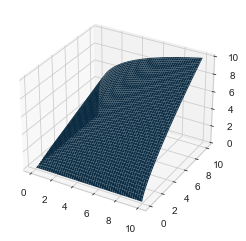

In [14]:
fig = plt.figure() # création de la figure
ax = fig.add_subplot(1,1,1,projection='3d') # création d'un système d'axes 3d sur la figure
ax.plot_surface(q1_vals,q2_vals,u_vals); # création d'un graph de surface sur le système d'axes

# remarque: fig.add_subplot(a,b,c) crée le c'th sous-graph sur une grille de a x b graphs

Faire que la figure soit **zoomable** et **interactive** avec widget

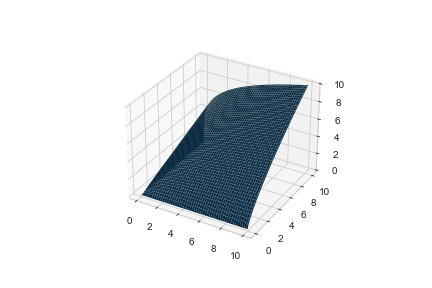

In [15]:
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # création d'un système d'axes 3d sur la figure
ax.plot_surface(q1_vals,q2_vals,u_vals); # création d'un graph de surface sur le système d'axes

On revient sur l'affichage en ligne

In [8]:
%matplotlib inline

**Extensions**: couleurs, rendre la figure plus agréable visuellement, sauvegarde.

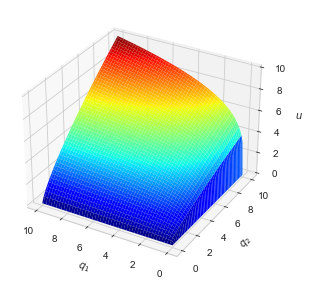

In [30]:
from matplotlib import cm # pour 'colormap', couleurs pour la figure

# a. le graphique en cours
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(q1_vals,q2_vals,u_vals,cmap=cm.jet)

# b. ajouts de labels
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$u$')

# c. inversion de l'axe des 'x' pour amener l'origine au devant au centre 
ax.invert_xaxis()

# d. sauvegarde
fig.tight_layout()
fig.savefig('unefigure.pdf') # ici .pdf mais peut être un autre format, e.g., .png 

**Plus d'options pour le format?** voir ces [exemples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py).

**Exercice**: construire le graphique suivant,

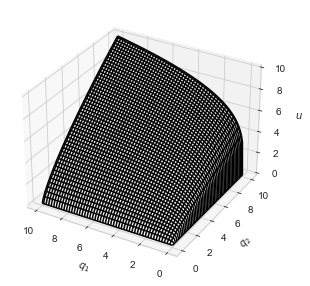

In [31]:
# a. graphique en cours
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(q1_vals, q2_vals,u_vals,edgecolor='black')

# b. add labels
ax.set_xlabel('$q_1$')
ax.set_ylabel('$q_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# e. save
fig.tight_layout()
fig.savefig('unefigure_cadre2.png')
fig.savefig('unefigure_cadre2.pdf')